We start this notebook by typing a "magic" command that allows iPython notebooks to display plots directly in the browser.

In [1]:
# Render our plots inline
%matplotlib inline


In order to read and process files, we are going to use a very powerful, and widely used Python library, called pandas. So, our next step is to import the pandas library in Python, and also import the library matplotlib for generating plots:

In [2]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

Pandas should already be installed on your machine, but if you get an error in the import statement above, indicating that pandas is not available, please uncomment the following command and execute:

In [3]:
#!sudo python3 -m pip install -U pandas

And we type some code to simply change the visual style of the plots. (The code below is optional and not necessary, and for now you do not need to understand what exactly is happening.)

In [4]:
# Make the graphs a bit bigger
matplotlib.style.use(['seaborn-talk', 'seaborn-ticks', 'seaborn-whitegrid'])

### Basic Example: Creating a DataFrame from Scratch

This is an example of creating a dataframe by passing a list of dictionaries.

In [5]:
df = pd.DataFrame([ 
    {"First Name": "Norman", "Last Name":" White"},
    {"First Name": "John", "Last Name":" Doe"},
    {"Last Name":"Trump"}
])


In [6]:
df

,First Name,Last Name
0,Norman,White
1,John,Doe
2,NaN,Trump


### Reading Data Files

Let's take a look at the restaurant inspections file (at `data/restaurants.csv`), which we used in our earlier classes.

If you do not have it, then uncomment and execute the following:

In [7]:
# !curl 'https://data.cityofnewyork.us/api/views/43nn-pn8j/rows.csv?accessType=DOWNLOAD' -o data/restaurant.csv

In [8]:
# !rm data/restaurant.csv.gz
# !gzip data/restaurant.csv

In [9]:
!gzip -cd data/restaurant.csv.gz | head -3

CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE
41047105,LIBRETTO'S PIZZERIA,MANHATTAN,546,3 AVENUE,10016,2122136445,American,07/31/2015,Violations were cited in the following area(s).,04N,"Filth flies or food/refuse/sewage-associated (FRSA) flies present in facilitys food and/or non-food areas. Filth flies include house flies, little house flies, blow flies, bottle flies and flesh flies. Food/refuse/sewage-associated flies include fruit flies, drain flies and Phorid flies.",Critical,24,,,05/06/2017,Cycle Inspection / Initial Inspection
40388386,LEE'S VILLA CHINESE RESTAURANT,BROOKLYN,152,LAWRENCE STREET,11201,7188551818,Chinese,10/28/2015,Violations were cited in the following area(s).,10B,Plumbing not properly installed or maintained; anti-siphonage or backflow prevention device not provided where required; equipment or floor not properly drai

### Reading a CSV file

We want to be able to read and process this file within Python. The pandas library has a very convenient method `read_csv` which reads the file, and returns back a variable that contains its contents.

In [10]:
import pandas as pd
restaurants = pd.read_csv("data/restaurant.csv.gz", encoding="utf-8", dtype="unicode")

When you read a CSV, you get back a kind of object called a DataFrame, which is made up of rows and columns. You get columns out of a DataFrame the same way you get elements out of a dictionary. Let's take a look at how the object looks like:

In [11]:
restaurants.head(5)

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE
0,41047105,LIBRETTO'S PIZZERIA,MANHATTAN,546,3 AVENUE,10016,2122136445,American,07/31/2015,Violations were cited in the following area(s).,04N,Filth flies or food/refuse/sewage-associated (...,Critical,24,NaN,NaN,05/06/2017,Cycle Inspection / Initial Inspection
1,40388386,LEE'S VILLA CHINESE RESTAURANT,BROOKLYN,152,LAWRENCE STREET,11201,7188551818,Chinese,10/28/2015,Violations were cited in the following area(s).,10B,Plumbing not properly installed or maintained;...,Not Critical,8,A,10/28/2015,05/06/2017,Cycle Inspection / Re-inspection
2,40392685,DOJO RESTAURANT,MANHATTAN,10,WEST 4 STREET,10012,2125058934,Japanese,05/19/2015,Violations were cited in the following area(s).,20F,Current letter grade card not posted.,Not Critical,NaN,NaN,NaN,05/06/2017,Administrative Miscellaneous / Initial Inspection
3,40756287,BARBARESCO,MANHATTAN,843,LEXINGTON AVENUE,10065,2125172288,Italian,02/12/2015,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,17,NaN,NaN,05/06/2017,Cycle Inspection / Initial Inspection
4,41452373,PEACHES MARKET TABLE,BROOKLYN,415,TOMPKINS AVENUE,11216,7184839111,Soul Food,04/25/2016,Violations were cited in the following area(s).,10B,Plumbing not properly installed or maintained;...,Not Critical,7,A,04/25/2016,05/06/2017,Cycle Inspection / Initial Inspection


The read_csv method has many options, and you can read further in the [online documentation](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.io.parsers.read_csv.html).

### Descriptive statistics

We can use the method "describe()" to get a quick overview of the data in the dataframe.

In [12]:
restaurants.describe()

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE
count,418541,418281,418541,418446,418539,418539,418536,418541,418541,417616,411458,411157,418541,393333,204053,202466,418541,417616
unique,26318,20818,6,7249,3313,232,25046,84,1404,5,94,92,3,119,7,1316,1,34
top,50001880,DUNKIN' DONUTS,MANHATTAN,0,BROADWAY,10003,7186566210,American,01/01/1900,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Critical,12,A,08/24/2016,05/06/2017,Cycle Inspection / Initial Inspection
freq,95,4473,167187,2559,15603,11702,241,96398,925,399001,58597,58597,229271,40350,160078,474,418541,237552


We can also check the data types for each column

In [13]:
restaurants.dtypes

CAMIS                    object
DBA                      object
BORO                     object
BUILDING                 object
STREET                   object
ZIPCODE                  object
PHONE                    object
CUISINE DESCRIPTION      object
INSPECTION DATE          object
ACTION                   object
VIOLATION CODE           object
VIOLATION DESCRIPTION    object
CRITICAL FLAG            object
SCORE                    object
GRADE                    object
GRADE DATE               object
RECORD DATE              object
INSPECTION TYPE          object
dtype: object

The `object` type is a string. For many of these, we would like to change the data types for a few columns, using the `pd.to_numeric` and `pd.to_datetime` functions:

In [14]:
restaurants["SCORE"] = pd.to_numeric(restaurants["SCORE"])
restaurants.dtypes

CAMIS                     object
DBA                       object
BORO                      object
BUILDING                  object
STREET                    object
ZIPCODE                   object
PHONE                     object
CUISINE DESCRIPTION       object
INSPECTION DATE           object
ACTION                    object
VIOLATION CODE            object
VIOLATION DESCRIPTION     object
CRITICAL FLAG             object
SCORE                    float64
GRADE                     object
GRADE DATE                object
RECORD DATE               object
INSPECTION TYPE           object
dtype: object

In [15]:
restaurants[["SCORE"]].describe()

,SCORE
count,393333.000000
mean,18.744679
std,12.600985
min,-2.000000
25%,11.000000
50%,15.000000
75%,24.000000
max,138.000000


Now let's convert the dates columns into the appropriate data types:

In [16]:
restaurants["GRADE DATE"] = pd.to_datetime(restaurants["GRADE DATE"], format="%m/%d/%Y")
restaurants["RECORD DATE"] = pd.to_datetime(restaurants["RECORD DATE"], format="%m/%d/%Y")
restaurants["INSPECTION DATE"] = pd.to_datetime(restaurants["INSPECTION DATE"], format="%m/%d/%Y")

In [17]:
restaurants.dtypes

CAMIS                            object
DBA                              object
BORO                             object
BUILDING                         object
STREET                           object
ZIPCODE                          object
PHONE                            object
CUISINE DESCRIPTION              object
INSPECTION DATE          datetime64[ns]
ACTION                           object
VIOLATION CODE                   object
VIOLATION DESCRIPTION            object
CRITICAL FLAG                    object
SCORE                           float64
GRADE                            object
GRADE DATE               datetime64[ns]
RECORD DATE              datetime64[ns]
INSPECTION TYPE                  object
dtype: object

In [18]:
restaurants[["INSPECTION DATE", "GRADE DATE", "RECORD DATE"]].describe()

,INSPECTION DATE,GRADE DATE,RECORD DATE
count,418541,202466,418541
unique,1404,1316,1
top,1900-01-01 00:00:00,2016-08-24 00:00:00,2017-05-06 00:00:00
freq,925,474,418541
first,1900-01-01 00:00:00,2012-05-01 00:00:00,2017-05-06 00:00:00
last,2017-05-04 00:00:00,2017-05-04 00:00:00,2017-05-06 00:00:00


In [19]:
restaurants["BORO"] =  pd.Categorical(restaurants["BORO"], ordered=False)
restaurants["GRADE"] =  pd.Categorical(restaurants["GRADE"], categories = ['A', 'B', 'C'], ordered=True)
restaurants["VIOLATION CODE"] =  pd.Categorical(restaurants["VIOLATION CODE"], ordered=False)
restaurants["CRITICAL FLAG"] =  pd.Categorical(restaurants["CRITICAL FLAG"], ordered=False)
restaurants["ACTION"] =  pd.Categorical(restaurants["ACTION"], ordered=False)
restaurants["CUISINE DESCRIPTION"] =  pd.Categorical(restaurants["CUISINE DESCRIPTION"], ordered=False)
restaurants.dtypes

CAMIS                            object
DBA                              object
BORO                           category
BUILDING                         object
STREET                           object
ZIPCODE                          object
PHONE                            object
CUISINE DESCRIPTION            category
INSPECTION DATE          datetime64[ns]
ACTION                         category
VIOLATION CODE                 category
VIOLATION DESCRIPTION            object
CRITICAL FLAG                  category
SCORE                           float64
GRADE                          category
GRADE DATE               datetime64[ns]
RECORD DATE              datetime64[ns]
INSPECTION TYPE                  object
dtype: object

In [20]:
restaurants.describe(include='all')

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE
count,418541,418281,418541,418446,418539,418539,418536,418541,418541,417616,411458,411157,418541,393333.000000,198713,202466,418541,417616
unique,26318,20818,6,7249,3313,232,25046,84,1404,5,94,92,3,NaN,3,1316,1,34
top,50001880,DUNKIN' DONUTS,MANHATTAN,0,BROADWAY,10003,7186566210,American,1900-01-01 00:00:00,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Critical,NaN,A,2016-08-24 00:00:00,2017-05-06 00:00:00,Cycle Inspection / Initial Inspection
freq,95,4473,167187,2559,15603,11702,241,96398,925,399001,58597,58597,229271,NaN,160078,474,418541,237552
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1900-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,2012-05-01 00:00:00,2017-05-06 00:00:00,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-05-04 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,2017-05-04 00:00:00,2017-05-06 00:00:00,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.744679,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.600985,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.000000,NaN,NaN,NaN,NaN


### Selecting a subset of the columns

In a dataframe, we can specify the column(s) that we want to keep, and get back another dataframe with just the subset of the columns that we want to keep.

In [21]:
restaurants["VIOLATION CODE"].head(5)

0    04N
1    10B
2    20F
3    04L
4    10B
Name: VIOLATION CODE, dtype: category
Categories (94, object): [02A, 02B, 02C, 02D, ..., 22C, 22E, 22F, 22G]

In [22]:
column_list = ["GRADE DATE","VIOLATION CODE", "DBA"]
restaurants[ column_list ].head(5)

,GRADE DATE,VIOLATION CODE,DBA
0,NaT,04N,LIBRETTO'S PIZZERIA
1,2015-10-28,10B,LEE'S VILLA CHINESE RESTAURANT
2,NaT,20F,DOJO RESTAURANT
3,NaT,04L,BARBARESCO
4,2016-04-25,10B,PEACHES MARKET TABLE


We can also get quick statistics about the common values that appear in each column:

In [23]:
restaurants["DBA"].value_counts()

DUNKIN' DONUTS                    4473
SUBWAY                            4136
MCDONALD'S                        2882
STARBUCKS                         2260
DUNKIN' DONUTS, BASKIN ROBBINS    1512
                                  ... 
212 BURGER                           1
67 CIAO                              1
MUSE PAINTBAR                        1
TWIST IT TOP IT                      1
BROOKLYN CHOW                        1
Name: DBA, Length: 20818, dtype: int64

In [24]:
restaurants["CUISINE DESCRIPTION"].value_counts()[:20]

American                                                            96398
Chinese                                                             44233
Latin (Cuban, Dominican, Puerto Rican, South & Central American)    20035
Pizza                                                               19742
Italian                                                             19306
Mexican                                                             15840
CafÃ©/Coffee/Tea                                                    15749
Japanese                                                            15005
Caribbean                                                           13287
Bakery                                                              12329
Spanish                                                             12063
Pizza/Italian                                                        9202
Delicatessen                                                         6515
Asian                                 

In [25]:
violation_counts = restaurants["VIOLATION CODE"].value_counts()
violation_counts[0:10]

10F    58597
08A    41026
02G    29967
04L    29241
06D    26945
06C    26111
10B    22889
02B    20458
04N    19329
04H     9559
Name: VIOLATION CODE, dtype: int64

And we can use the "plot" command to plot the resulting histogram. (More details at http://pandas.pydata.org/pandas-docs/stable/visualization.html) We also revisit plotting below.

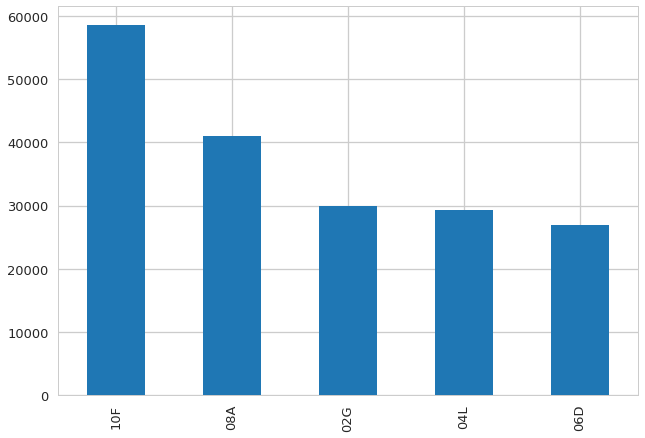

In [26]:
violation_counts[:5].plot(kind='bar')

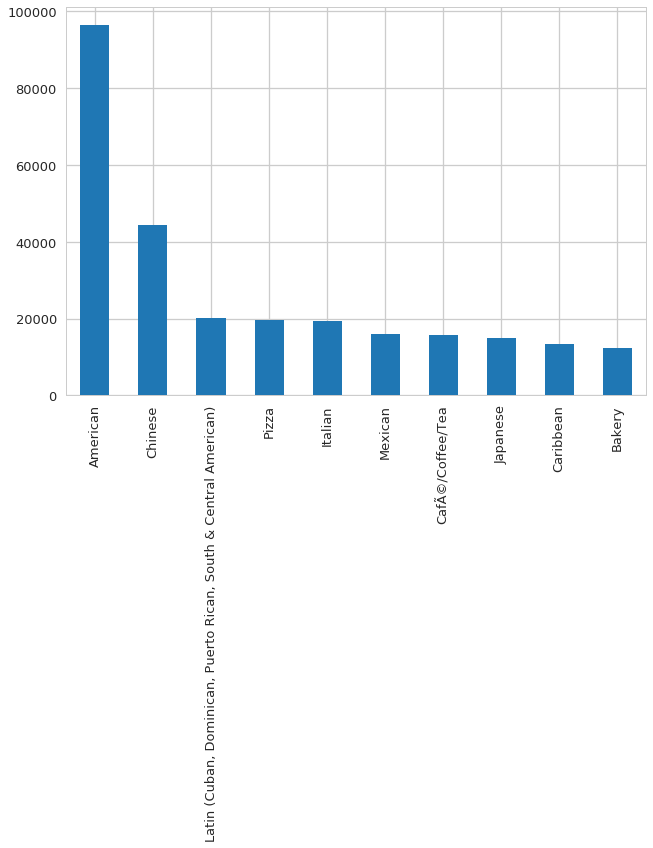

In [27]:
popular = restaurants["CUISINE DESCRIPTION"].value_counts()
popular[:10].plot(kind='bar')

### Selecting rows

To select rows, we can use the following approach, where we generate a list of boolean values, one for each row of the dataframe, and then we use the list to select which of the rows of the dataframe we want to keep"

In [28]:
# Create the condition "has mice" for code 04L
mice = (restaurants["VIOLATION CODE"] == "04L")
mice

0         False
1         False
2         False
3          True
4         False
          ...  
418536    False
418537    False
418538    False
418539    False
418540    False
Name: VIOLATION CODE, Length: 418541, dtype: bool

In [29]:
# Apply the condition to the dataframe "restaurants" and store the result 
# in a dataframe called  has_mice
has_mice = restaurants[mice]
has_mice

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE
3,40756287,BARBARESCO,MANHATTAN,843,LEXINGTON AVENUE,10065,2125172288,Italian,2015-02-12,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,17.0,NaN,NaT,2017-05-06,Cycle Inspection / Initial Inspection
13,41671728,ZERZA,MANHATTAN,320,EAST 6 STREET,10003,2125298250,Moroccan,2015-09-01,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,20.0,NaN,NaT,2017-05-06,Cycle Inspection / Initial Inspection
31,40363920,NEW GOLDEN BILLION,BROOKLYN,976,RUTLAND ROAD,11212,7187357707,Chinese,2014-04-23,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,13.0,A,2014-04-23,2017-05-06,Cycle Inspection / Initial Inspection
40,50013286,THE PIKE,QUEENS,27102,UNION TPKE,11040,7183478052,American,2016-07-13,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,19.0,NaN,NaT,2017-05-06,Cycle Inspection / Initial Inspection
46,50017920,OUTBACK STEAKHOUSE,BROOKLYN,355,GATEWAY DR,11239,8132821225,American,2016-03-03,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,11.0,A,2016-03-03,2017-05-06,Cycle Inspection / Initial Inspection
55,41379907,JASLOWICZANKA POLISH BAKERY,BROOKLYN,163,NASSAU AVENUE,11222,7183890263,Bakery,2014-01-06,Establishment Closed by DOHMH. Violations wer...,04L,Evidence of mice or live mice present in facil...,Critical,60.0,NaN,NaT,2017-05-06,Cycle Inspection / Initial Inspection
59,50032749,JERRY'S COFFEE SHOP,BRONX,970,LONGWOOD AVE,10459,7188238073,Sandwiches,2016-04-27,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,14.0,B,2016-04-27,2017-05-06,Cycle Inspection / Re-inspection
61,41705067,SAKAMAI,MANHATTAN,157,LUDLOW STREET,10002,6465900684,Asian,2016-12-28,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,20.0,B,2016-12-28,2017-05-06,Cycle Inspection / Re-inspection
85,50003077,LAURA'S PIZZA,BRONX,3073,BAILEY AVE,10463,7184321313,Italian,2017-02-01,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,20.0,NaN,NaT,2017-05-06,Cycle Inspection / Initial Inspection
101,41098217,RED 58,MANHATTAN,158,WEST 58 STREET,10019,2122450125,American,2014-11-06,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,27.0,B,2014-11-06,2017-05-06,Cycle Inspection / Re-inspection


In [30]:
# List the most frequent DBA values in the dataframe
has_mice["DBA"].value_counts()[:20]

SUBWAY                                   283
DUNKIN' DONUTS                           160
CROWN FRIED CHICKEN                      124
KENNEDY FRIED CHICKEN                    101
DOMINO'S                                  95
MCDONALD'S                                84
DUNKIN' DONUTS, BASKIN ROBBINS            81
GOLDEN KRUST CARIBBEAN BAKERY & GRILL     77
POPEYES LOUISIANA KITCHEN                 73
STARBUCKS                                 64
BURGER KING                               61
PAPA JOHN'S                               59
CARVEL ICE CREAM                          53
LITTLE CAESARS                            33
AMC THEATRES                              30
GINO'S PIZZA                              27
CHIPOTLE MEXICAN GRILL                    27
NO. 1 CHINESE RESTAURANT                  27
KFC                                       26
JOE'S PIZZA                               25
Name: DBA, dtype: int64

In [31]:
has_mice["CAMIS"].value_counts()[:5]

41430594    14
41485393    13
41691396    13
41309387    13
40861669    13
Name: CAMIS, dtype: int64

In [32]:
condition = (restaurants["CAMIS"] == '41430594')
restaurants[condition]


,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE
3595,41430594,1 STOP PATTY SHOP,MANHATTAN,1708,AMSTERDAM AVENUE,10031,2124917466,Bakery,2016-09-07,Establishment Closed by DOHMH. Violations wer...,04L,Evidence of mice or live mice present in facil...,Critical,48.0,NaN,NaT,2017-05-06,Cycle Inspection / Re-inspection
4920,41430594,1 STOP PATTY SHOP,MANHATTAN,1708,AMSTERDAM AVENUE,10031,2124917466,Bakery,2016-09-07,Establishment Closed by DOHMH. Violations wer...,05F,Insufficient or no refrigerated or hot holding...,Critical,48.0,NaN,NaT,2017-05-06,Cycle Inspection / Re-inspection
29519,41430594,1 STOP PATTY SHOP,MANHATTAN,1708,AMSTERDAM AVENUE,10031,2124917466,Bakery,2015-04-13,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,6.0,A,2015-04-13,2017-05-06,Cycle Inspection / Re-inspection
31701,41430594,1 STOP PATTY SHOP,MANHATTAN,1708,AMSTERDAM AVENUE,10031,2124917466,Bakery,2016-07-14,Violations were cited in the following area(s).,15I,''''No Smoking and/or 'Smoking Permitted sig...,Not Critical,NaN,NaN,NaT,2017-05-06,Smoke-Free Air Act / Initial Inspection
34511,41430594,1 STOP PATTY SHOP,MANHATTAN,1708,AMSTERDAM AVENUE,10031,2124917466,Bakery,2016-07-14,Establishment Closed by DOHMH. Violations wer...,04N,Filth flies or food/refuse/sewage-associated (...,Critical,30.0,NaN,NaT,2017-05-06,Cycle Inspection / Initial Inspection
49826,41430594,1 STOP PATTY SHOP,MANHATTAN,1708,AMSTERDAM AVENUE,10031,2124917466,Bakery,2016-07-22,Establishment re-opened by DOHMH,04L,Evidence of mice or live mice present in facil...,Critical,7.0,NaN,2016-07-22,2017-05-06,Cycle Inspection / Reopening Inspection
65128,41430594,1 STOP PATTY SHOP,MANHATTAN,1708,AMSTERDAM AVENUE,10031,2124917466,Bakery,2015-12-16,Violations were cited in the following area(s).,22F,NaN,Not Applicable,33.0,NaN,NaT,2017-05-06,Cycle Inspection / Initial Inspection
92400,41430594,1 STOP PATTY SHOP,MANHATTAN,1708,AMSTERDAM AVENUE,10031,2124917466,Bakery,2015-04-04,Violations were cited in the following area(s).,08C,Pesticide use not in accordance with label or ...,Not Critical,2.0,NaN,NaT,2017-05-06,Cycle Inspection / Initial Inspection
97189,41430594,1 STOP PATTY SHOP,MANHATTAN,1708,AMSTERDAM AVENUE,10031,2124917466,Bakery,2016-09-13,Establishment re-opened by DOHMH,08A,Facility not vermin proof. Harborage or condit...,Not Critical,9.0,C,2016-09-13,2017-05-06,Cycle Inspection / Reopening Inspection
105935,41430594,1 STOP PATTY SHOP,MANHATTAN,1708,AMSTERDAM AVENUE,10031,2124917466,Bakery,2016-07-14,Establishment Closed by DOHMH. Violations wer...,04L,Evidence of mice or live mice present in facil...,Critical,30.0,NaN,NaT,2017-05-06,Cycle Inspection / Initial Inspection


And we can use more complex conditions:

In [33]:
mice_manhattan = (restaurants["VIOLATION CODE"] == "04L") \
                    & (restaurants["BORO"] == "MANHATTAN") \
                    & (restaurants["ZIPCODE"] == "10012")

In [34]:
has_mice_10012 = restaurants[mice_manhattan]
has_mice_10012

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE
1152,40728858,VOL DE NUIT,MANHATTAN,148,WEST 4 STREET,10012,2129823388,French,2017-03-10,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,13.0,A,2017-03-10,2017-05-06,Cycle Inspection / Initial Inspection
1444,50000598,UNCLE TED'S,MANHATTAN,163,BLEECKER STREET,10012,2127771395,Chinese,2016-10-03,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,46.0,NaN,NaT,2017-05-06,Cycle Inspection / Initial Inspection
6340,40380648,PORTO BELLO RESTAURANT,MANHATTAN,208,THOMPSON STREET,10012,2124737794,Italian,2016-08-15,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,21.0,NaN,NaT,2017-05-06,Cycle Inspection / Initial Inspection
8289,50036898,SUSHI SUSHI,MANHATTAN,126,MACDOUGAL ST,10012,2124774000,Japanese,2016-10-06,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,14.0,NaN,NaT,2017-05-06,Cycle Inspection / Initial Inspection
8371,41455503,CAFE ANGELIQUE EXPRESS,MANHATTAN,575,BROADWAY,10012,2123432433,CafÃ©/Coffee/Tea,2014-02-03,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,11.0,A,2014-02-03,2017-05-06,Cycle Inspection / Re-inspection
8438,40727820,HOUSING WORKS FOOD,MANHATTAN,126,CROSBY STREET,10012,2129660466,American,2014-08-22,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,12.0,A,2014-08-22,2017-05-06,Cycle Inspection / Initial Inspection
8829,40577007,ACME BAR & GRILL,MANHATTAN,9,GREAT JONES STREET,10012,2122032121,American,2014-08-12,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,21.0,NaN,NaT,2017-05-06,Cycle Inspection / Initial Inspection
9769,40379149,MONTE'S,MANHATTAN,97,MACDOUGAL STREET,10012,2122289194,Italian,2014-01-29,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,12.0,A,2014-01-29,2017-05-06,Cycle Inspection / Re-inspection
12003,41679646,GREENWICH VILLAGE COMEDY CLUB,MANHATTAN,99,MACDOUGAL STREET,10012,2127775233,American,2015-08-13,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,9.0,A,2015-08-13,2017-05-06,Cycle Inspection / Initial Inspection
12579,40879743,NEGRIL,MANHATTAN,70,WEST 3 STREET,10012,2124772804,Caribbean,2015-04-16,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,12.0,A,2015-04-16,2017-05-06,Cycle Inspection / Re-inspection


In [35]:
has_mice_10012["DBA"].value_counts()[:20]

VIN ET FLEURS                   8
MEXICAN RADIO                   8
DOJO RESTAURANT                 7
OLD TBILISI                     7
THE VILLAGE LANTERN             7
KOPI KOPI                       7
TARTINERY                       7
MONTE'S                         7
PORTO BELLO RESTAURANT          7
TRIONA'S                        7
INSOMNIA COOKIES                6
UNCLE TED'S                     6
CAFE ESPANOL                    6
VESUVIO BAKERY                  6
JACQUES 1534                    6
PERCY'S PIZZA                   6
LA LANTERNA DI VITTORIO         5
OFF THE WAGON                   5
TOMOE SUSHI                     5
COCO & CRU/SWEETWATER SOCIAL    5
Name: DBA, dtype: int64

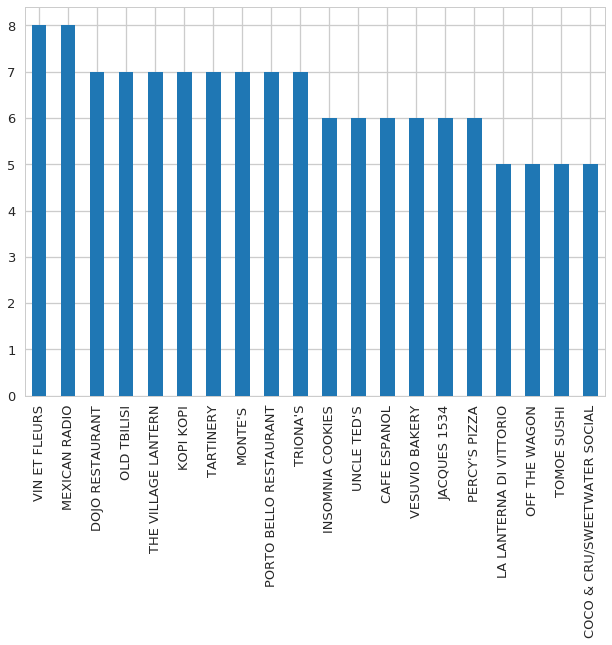

In [36]:
has_mice_10012["DBA"].value_counts()[:20].plot(kind='bar')

### Pivot Tables

[Pivot tables](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.pivot_table.html) is one of the most commonly used exploratory tools, and in Pandas they are extremely flexible. 

For example, let's try to count the number of restaurants that are inspected every day. 

In [37]:
pivot = pd.pivot_table(
    data = restaurants, 
    index = 'INSPECTION DATE', 
    values = 'CAMIS', 
    aggfunc = 'count'
)

In [38]:
pivot

,CAMIS
INSPECTION DATE,
1900-01-01,925
2011-10-07,1
2012-05-01,2
2012-06-23,1
2012-10-24,1
2012-11-29,2
2012-11-30,2
2012-12-11,5
2012-12-18,3


##### Changing date granularity 

We can also use the `[resample](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.resample.html)` command to change the frequency from one day, to, say, 7 days.

In [39]:
pivot.resample('7D').mean()

,CAMIS
INSPECTION DATE,
1900-01-01,925.000000
1900-01-08,NaN
1900-01-15,NaN
1900-01-22,NaN
1900-01-29,NaN
1900-02-05,NaN
1900-02-12,NaN
1900-02-19,NaN
1900-02-26,NaN


Now, let's plot this. By default, Pandas considers the "index" column to be the x-axis, and plots the rest.

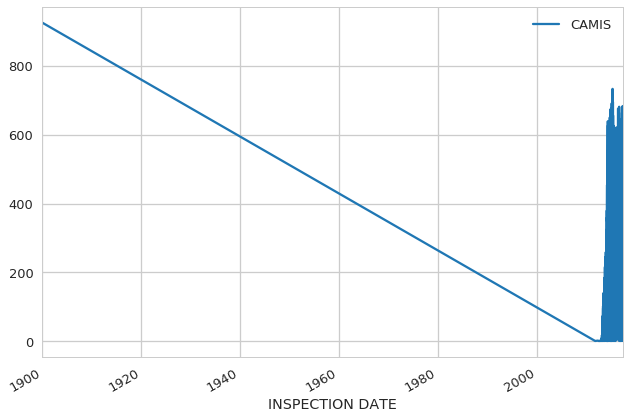

In [40]:
pivot.plot()

#### Deleting rows from a DataFrame

Hm, that '1900-01-01' line is messing things up. Let's delete it, using the `drop` command. Notice a few things:
* We use the `pd.to_datetime` command to convert the '1900-01-01' string into a datetime data type.
* We use the `axis=0` parameter means that we delete a **row** with that index value. (The `axis=1` means that we delete a column.)
* The `inplace=True` means that we change directly the dataframe, instead of returning a new dataframe that does not have the deleted value.

In [41]:
pivot.drop(pd.to_datetime('1900-01-01'), axis=0, inplace=True) 

And let's plot again.

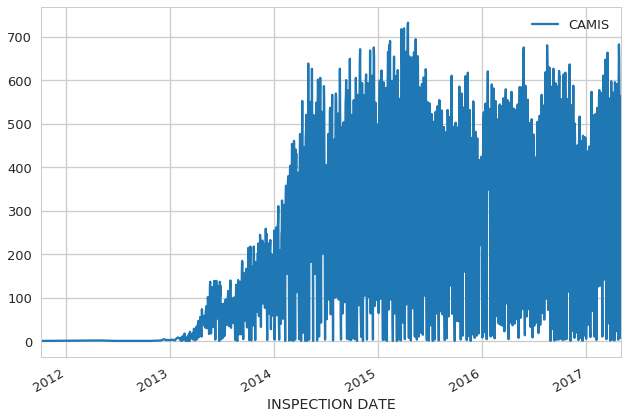

In [42]:
pivot.plot()

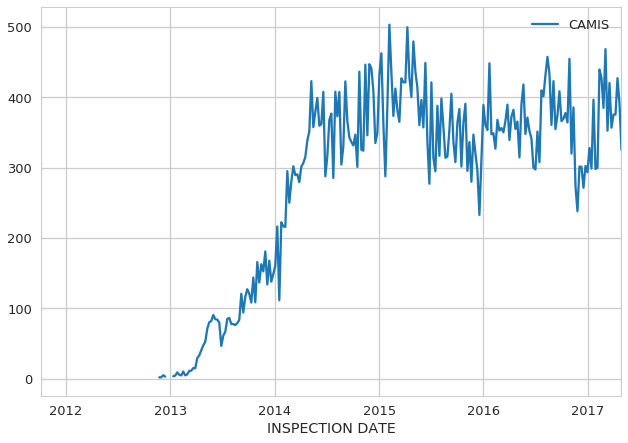

In [43]:
pivot.resample('7D').mean().plot()

#### Pivot Table with two (or more) variables)

We would like to break down the results by borough, so we add the `column` parameter.

In [44]:
pivot2 = pd.pivot_table(
    data = restaurants, #
    index = 'INSPECTION DATE', 
    columns = 'BORO', 
    values = 'CAMIS', 
    aggfunc = 'count'
)

In [45]:
pivot2.head(10)

BORO,BRONX,BROOKLYN,MANHATTAN,Missing,QUEENS,STATEN ISLAND
INSPECTION DATE,,,,,,
1900-01-01,74.0,253.0,370.0,2.0,191.0,35.0
2011-10-07,NaN,NaN,NaN,NaN,1.0,NaN
2012-05-01,NaN,NaN,NaN,NaN,2.0,NaN
2012-06-23,NaN,NaN,NaN,NaN,1.0,NaN
2012-10-24,NaN,NaN,1.0,NaN,NaN,NaN
2012-11-29,NaN,NaN,NaN,NaN,NaN,2.0
2012-11-30,NaN,NaN,2.0,NaN,NaN,NaN
2012-12-11,NaN,NaN,5.0,NaN,NaN,NaN
2012-12-18,3.0,NaN,NaN,NaN,NaN,NaN


##### Deleting rows and columns

Now, you will notice that there are a few columns and rows that are just noise. The first row with date *'1900-01-01'* is clearly noise, and the *'Missing'* columns the same. We can use the `drop` command of Pandas to drop these.

In [46]:
# The "axis=0" means that we delete a row with that index value
pivot2 = pivot2.drop(pd.to_datetime('1900-01-01'), axis=0) 

In [47]:
# The "axis=1" means that we delete a columns with that value
pivot2 = pivot2.drop('Missing', axis=1)

### Exercise 

Now let's do the same exercise, but instead of counting the number of inspections, we want to compute the average score assigned by the inspectors. Hint: We will need to change the `values` and the `aggfunc` parameters in the `pivot_table` function above.

In [48]:
# your code here

### Exercise

* We interacted with the NYC Restaurant Inspection Data. Now, let's download another dataset, and do some analysis. We will focus on the [NYPD Vehicle Collissions](https://data.cityofnewyork.us/Public-Safety/NYPD-Motor-Vehicle-Collisions/h9gi-nx95/data) data set.


* Task 1: Download the dataset. Use the "Export" view, get the URL for the CSV file, and dowload it using curl. (See the top of the notebook for guidance.) 



* Task 2: Find out the most common contributing factors to the collisions. 
 

   
* Task 3: Break down the number of collisions by borough.





* Task 4: Find out the how many collisions had 0 persons injured, 1 persons injured, etc. persons injured in each accident. Use the `value_counts()` approach. You may also find the `.plot(logy=True)` option useful when you create the plot to make the y-axis logarigthmic.
 

   
* Task 5: Break down the accidents by borough and contributing factor. Use the `pivot_table` function of Pandas
 

 * Task 6: Find the dates with the most accidents. Can you figure out what happened on these days? 



* Task 7: Plot the number of accidents per day. (Hint: Ensure that your date column is in the right datatype and that it is properly sorted, before plotting)


* Task 8: Plot the accidents in map. Use a scatter plot using the `plot(kind='scatter', x=..., y=....)` command, and use the `LATITUDE` and `LONGITUDE` parameters. (Hint: You may have to delete bad data points before getting into the right visual result.)

* Task 9: Plot the accidents in map as above, but limit the data only to accidents with at least one injury.